In [38]:
import numpy as np
import matplotlib.pyplot as plt


def style(cell):
    """style(n)
    Funkcja sprawdzająca zgodność komórki `In[n]` notatnika
    ze standardem stylu PEP-8."""
    try:
        import pycodestyle as pep8
    except ImportError:
        import pep8
    code = (In[cell]+'\n').splitlines(True)
    return pep8.Checker('In[{0}]'.format(cell), code).check_all()


def catalan(n):
    if n == 0 or n == 1:
        return 1
    catalan = [0 for i in range(n + 1)]
    catalan[0] = 1
    catalan[1] = 1
    for i in range(2, n + 1):
        catalan[i] = 0
        for j in range(i):
            catalan[i] = catalan[i] + catalan[j] * catalan[i-j-1]
    return catalan[n]


def liczby_catalana(n):
    '''
    Funkcja przygotowująca listę liczb catalana'''
    lista_liczb = []
    lista_liczb.append(catalan(n))
    return lista_liczb[-1]


def stirling_f(n):
    '''
    Funkcja wyliczająca wartość funkcji stirlinga
    dla zadanego n.
    '''
    f = (4**n)/((n**(3/2))*np.sqrt(np.pi))
    return f


def parametry_zadanie_1():
    '''
    Funkcja przygotowująca parametry wykresu oraz
    poszczególne wartości pokazane na wykresie.
    '''
    cat, S, cf, N = [], [], [], []
    for i in range(1, 152, 10):
        cat.append(liczby_catalana(i))
        S.append(stirling_f(i))
        cf.append(cat[-1]/S[-1])
    N.append(1)
    for i in range(1, 15):
        N.append('$n_{{{i}}}$'.format(i=i))
    N.append(151)
    X, Y = [], []
    for x in range(1, 152, 10):
        X.append(x)
        Y.append(1)
    opis_y = [cf[0]]
    for i in range(1, len(cf)):
        if cf[i]-cf[i-1] > 0.04:
            opis_y.append(cf[i])
    opis_y.append(int(1))
    return X, Y, N, cf, opis_y


def stirling(n):
    '''
    Funkcja wylicza przybliżenie Stirling'a
    '''
    s = np.sqrt(2*np.pi*n)*((n/np.e)**n)
    return s


def ramanujan(n):
    '''
    Funkcja wylicza przybliżenie Ramanujan'a
    '''
    r = np.sqrt(np.pi)*((n/np.e)**n)*((8*(n**3)+4*(n**2)+n+(1/30))**(1/6))
    return r


def burnside(n):
    '''
    Funkcja wylicza przybliżenie Burnside'a
    '''
    b = np.sqrt(2*np.pi)*((n+0.5)/np.e)**(n+0.5)
    return(b)


def wyznacz_min_n(lista, dokladna_wartosc, eps):
    '''
    Funkcja wyznacza najmniejszą wartość n, dla której
    blad przyblizenia jest mniejszy od zadanego epsilona.
    '''
    m = len(lista)
    for i in range(m):
        przyblizenie = abs(lista[i] - dokladna_wartosc)
        if przyblizenie <= eps:
            min_n = i + 2
            break
    return min_n


def parametry_zadanie_2(eps=0.0006):
    '''
    Funkcja przygotowująca parametry do wykresu.
    Oblicza iloraz silni i jej przybliżenia oraz
    wyznacza najmniejsze n, dla którego błąd przybliżenia
    jest mniejszy niż zadany epsilon.
    '''
    X, Sti, Ram, Bur = [], [], [], []
    for i in range(2, 151):
        silnia = m.factorial(i)
        Sti.append(silnia/stirling(i))
        Ram.append(silnia/ramanujan(i))
        Bur.append(silnia/burnside(i))
        X.append(i)
    min_s = wyznacz_min_n(Sti, 1, eps)
    min_r = wyznacz_min_n(Ram, 1, eps)
    min_b = wyznacz_min_n(Bur, 1, eps)
    opis_y = [1-10*eps, 1, 1+10*eps]
    opis_y_str = ['$1-10\epsilon$', '1', '$1+10\epsilon$']
    return X, N, Sti, Ram, Bur, min_s, min_r, min_b, y, y_str


([<matplotlib.axis.YTick at 0x1d3aa7be648>,
 <a list of 4 Text yticklabel objects>)

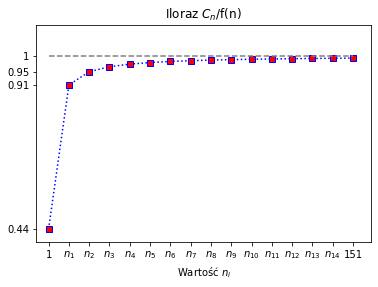

In [19]:
X, Y, N, cf, opis_y = parametry_zadanie_1()

plt.title('Iloraz $C_{n}$/f(n)')
plt.xlabel('Wartość $n_{i}$')
plt.xlim(-5, 160)
plt.ylim(0.4, 1.1,)
plt.plot(X, cf, 'r:', color='blue')
plt.plot(X, cf, 'bs', markersize=6, markerfacecolor='r')
plt.plot(X, Y, '--', color='grey')
plt.xticks(X, N)
plt.yticks(opis_y, [f'{y:.2f}' for y in opis_y[:-1]] + [f'{opis_y[-1]}'])

In [39]:
X, N, Sti, Ram, Bur, ns, nr, nb, y, y_str = parametry_zadanie_2()

([<matplotlib.axis.YTick at 0x1d3ac6a8608>,
 <a list of 3 Text yticklabel objects>)

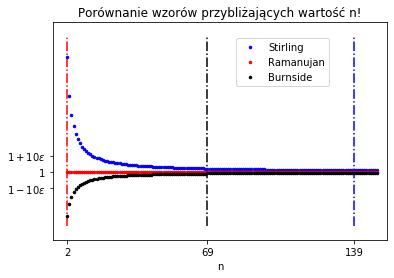

In [40]:
plt.title('Porównanie wzorów przybliżających wartość n!')
plt.plot(X, Sti, '.', markersize=5, color='blue', label='Stirling')
plt.vlines(ns, 0.980, 1.05, colors='blue', linestyles='dashdot')
plt.plot(X, Ram, '.', markersize=5, color='red', label='Ramanujan')
plt.vlines(nr, 0.980, 1.05, colors='red', linestyles='dashdot')
plt.plot(X, Bur, '.', markersize=5, color='black', label='Burnside')
plt.vlines(nb, 0.980, 1.05, colors='black', linestyles='dashdot')
plt.xlabel('n')
plt.xlim(-5, 155)
plt.ylim(0.975, 1.055)
plt.legend(bbox_to_anchor=(0.84, 0.95), loc='upper right')
plt.xticks([ns, nr, nb])
plt.yticks(y, y_str)